## Read from txt. file

In [2]:
import pandas as pd
import os

In [5]:
data = pd.read_csv('./Stock Data/A.txt', sep=",", names = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], header=None)

data.head(30)

,Date,Open,High,Low,Close,Volume
0,11/18/1999,28.14,30.92,24.97,26.25,70668279
1,11/19/1999,26.56,26.59,24.62,25.16,17431680
2,11/22/1999,26.07,27.21,25.28,27.17,7389715
3,11/23/1999,26.71,26.98,25.29,25.37,6776959
4,11/24/1999,24.82,25.94,24.74,25.36,5467957
5,11/26/1999,25.28,25.67,25.20,25.36,1998123
6,11/29/1999,25.36,26.25,25.09,25.94,4701392
7,11/30/1999,25.98,26.56,25.32,26.13,4945367
8,12/01/1999,26.09,26.87,25.90,26.75,3366184
9,12/02/1999,27.06,27.83,26.83,27.48,3544851


Select 1 year period series

In [1]:
import multiprocess as mp
from functools import partial
import os
import pandas as pd
import configparser
import json

def sec(i, name, data):
    import numpy as np
    import pandas as pd
    import json
    import datetime
    
    def dateDeviation(r1, r2):
        t1 = data['Date'][r1].split('/')
        t2 = data['Date'][r2].split('/')
        t1 = datetime.datetime(int(t1[2]),int(t1[0]),int(t1[1]))
        t2 = datetime.datetime(int(t2[2]),int(t2[0]),int(t2[1]))
        deviation = abs((t1 - t2).days)
        return deviation
    
    dataLen = len(data)
    r1, r2 = (np.random.random(2)*dataLen).astype(int)
    deviation = dateDeviation(r1, r2)
    while deviation < 300 or deviation > 400 or abs(r2-r1) < 30:
        r1, r2 = (np.random.random(2)*dataLen).astype(int)
        deviation = dateDeviation(r1, r2)
        
    r1, r2 = min(r1, r2), max(r1, r2)
#     ====================== Section normalize =====================
    d = int(abs(r2-r1)/30)
    MA = pd.DataFrame()
    MA['Date'] = data['Date']
    MA['Open'] = data['Open'].rolling(d).mean()
    MA['Open'] = MA['Open'].fillna(data['Open'])
    
    MA = MA[r1:r2]
    section = MA[0::d].head(30)
    section_open = section['Open']
    section['Norm'] = (section_open - section_open.min()) / (section_open.max() - section_open.min())
    
    Range = section["Date"].iloc[0] + ' ~ ' + section["Date"].iloc[-1]
    
    dump = {
        'Name' : name,
        'Range': Range,
        'Curve': np.round(section['Norm'].values, 3).tolist()
    }

    return dump

csv_columns = ['Name','Range','Curve']

def main(k):
    h = []
    all_stock = os.listdir('./Stock Data/')
    for companies in all_stock:
        name = companies.split('.')[0]
        data = pd.read_csv('./Stock Data/' + companies, sep=",", names = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], header=None)
        with mp.Pool(os.cpu_count()) as pool:

            partial_func = partial(sec, name=name, data=data)

            pool_outputs = pool.map(partial_func, range(k))
        print(companies)
        h = h + pool_outputs
    return h

if __name__ == '__main__':
    

    config = configparser.ConfigParser()
    config.read('config.ini')
    cifdic = {}
    for key, val in config.items('config'):
        if key == 'data_per_company':
            cifdic[key] = int(val)
        else:
            cifdic[key] = val
       
    h = main(cifdic['data_per_company'])
    with open(cifdic['json_file_name'] + '.json', 'w') as outfile:
        
        json.dump(h, outfile,ensure_ascii=False,indent=2)


A.txt
AA.txt
AAL.txt
AAP.txt
AAPL.txt
ABBV.txt
ABC.txt
ABK.txt
ABMD.txt
ABT.txt
ACE.txt
ACN.txt
ACS.txt
ADBE.txt
ADCT.txt
ADI.txt
ADM.txt
ADP.txt
ADS.txt
ADSK.txt
AEE.txt
AEP.txt
AES.txt
AET.txt
AFL.txt
AGN.txt
AIG.txt
AIV.txt
AIZ.txt
AJG.txt
AKAM.txt
AKS.txt
ALB.txt
ALGN.txt
ALK.txt
ALL.txt
ALLE.txt
ALXN.txt
AMAT.txt
AMCR.txt
AMD.txt
AME.txt
AMG.txt
AMGN.txt
AMP.txt
AMT.txt
AMZN.txt
AN.txt
ANDV.txt
ANET.txt
ANF.txt
ANR.txt
ANSS.txt
ANTM.txt
AOC.txt
AON.txt
AOS.txt
APA.txt
APC.txt
APD.txt
APH.txt
APOL.txt
APTV.txt
ARE.txt
ARG.txt
ARNC.txt
ASD.txt
ASH.txt
ASN.txt
AT.txt
ATI.txt
ATO.txt
ATVI.txt
AV.txt
AVB.txt
AVGO.txt
AVP.txt
AVY.txt
AW.txt
AWK.txt
AXP.txt
AYE.txt
AYI.txt
AZO.txt
BA.txt
BAC.txt
BAX.txt
BBBY.txt
BBT.txt
BBY.txt
BC.txt
BCR.txt
BDK.txt
BDX.txt
BEAM.txt
BEN.txt
BF.B.txt
BHGE.txt
BHI.txt
BIG.txt
BIIB.txt
BIO.txt
BJS.txt
BK.txt
BKNG.txt
BKR.txt
BLK.txt
BLL.txt
BMC.txt
BMET.txt
BMS.txt
BMY.txt
BNI.txt
BOL.txt
BR.txt
BRCM.txt
BRK.B.txt
BRL.txt
BSC.txt
BSX.txt
BTU.txt
BUD.txt
BW

## Open json file

In [1]:
import json
with open('StockData.json', 'r') as json_file:  
    h = json.load(json_file)


In [2]:
Name = []
Range = []
Curve = []

for item in h:
    Name.append(item['Name'].encode())
    Range.append(item['Range'].encode())
    Curve.append(item['Curve'])

In [3]:
t = 3
print(Name[t])
print(Range[t])
print(Curve[t])

b'A'
b'01/16/2009 ~ 11/05/2009'
[0.366, 0.393, 0.356, 0.339, 0.133, 0.0, 0.073, 0.184, 0.185, 0.244, 0.246, 0.383, 0.351, 0.334, 0.421, 0.405, 0.406, 0.442, 0.451, 0.585, 0.688, 0.724, 0.808, 0.822, 0.953, 1.0, 0.914, 0.942, 0.894, 0.799]


## Turn json to h5 file

In [ ]:
import h5py

f = h5py.File('Stock_HDF.h5','w')   #創建一個h5文件，文件指針是f  
f['Name'] = Name                 #將數據寫入文件的主鍵data下面  
f['Range'] = Range       #將數據寫入文件的主鍵labels下面  
f['Curve'] = Curve
f.close()                           #關閉文件  

In [6]:
import h5py
import numpy as np
f = h5py.File('Stock_HDF.h5','r')


In [7]:
Name = f['Name'] 
Range = f['Range'] 
Curve = f['Curve']


In [9]:
np.array(Range)

array([b'02/07/2013 ~ 01/09/2014', b'06/19/2002 ~ 04/09/2003',
       b'02/05/2010 ~ 01/06/2011', ..., b'02/26/2016 ~ 01/27/2017',
       b'04/05/2019 ~ 01/27/2020', b'05/05/2015 ~ 01/12/2016'],
      dtype='|S23')

In [33]:
np.array(Name)

array([b'A', b'A', b'A', ..., b'ZTS', b'ZTS', b'ZTS'], dtype='|S5')

In [11]:
import numpy as np
import pandas as pd
dataBase = pd.DataFrame(columns=['Name', 'Range'])
dataBase['Name'] = np.array(Name)
dataBase['Range'] = np.array(Range)
# dataBase['Curve'] = Curve
dataBase

# pd.read_hdf('Stock_HDF.h5')

,Name,Range
0,b'A',b'02/07/2013 ~ 01/09/2014'
1,b'A',b'06/19/2002 ~ 04/09/2003'
2,b'A',b'02/05/2010 ~ 01/06/2011'
3,b'A',b'01/16/2009 ~ 11/05/2009'
4,b'A',b'09/15/2017 ~ 08/17/2018'
...,...,...
7989995,b'ZTS',b'02/05/2013 ~ 01/07/2014'
7989996,b'ZTS',b'03/15/2013 ~ 02/14/2014'
7989997,b'ZTS',b'02/26/2016 ~ 01/27/2017'
7989998,b'ZTS',b'04/05/2019 ~ 01/27/2020'


In [20]:
dataBaseEdit = dataBase.loc[0]
dataBaseEdit['Name'] = dataBaseEdit['Name'].decode()
dataBaseEdit['Range'] = dataBaseEdit['Range'].decode()
dataBaseEdit['Curve'] = list(Curve[0])
dataBaseEdit.to_dict()

<ipython-input-20-09efd2d75603>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataBaseEdit['Name'] = dataBaseEdit['Name'].decode()
<ipython-input-20-09efd2d75603>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataBaseEdit['Range'] = dataBaseEdit['Range'].decode()
<ipython-input-20-09efd2d75603>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataBaseEdit['Curve'] = list(Curve[0])


{'Name': 'A',
 'Range': '02/07/2013 ~ 01/09/2014',
 'Curve': [0.207,
  0.17,
  0.014,
  0.098,
  0.053,
  0.0,
  0.096,
  0.058,
  0.055,
  0.232,
  0.284,
  0.211,
  0.13,
  0.141,
  0.278,
  0.301,
  0.298,
  0.348,
  0.367,
  0.437,
  0.607,
  0.628,
  0.618,
  0.648,
  0.608,
  0.725,
  0.765,
  0.834,
  0.984,
  1.0]}

## Compare data series 

In [4]:
import pandas as pd
import numpy as np
import random
import time

In [6]:
df = pd.DataFrame(h)

In [7]:
da = np.vstack(df['Curve'])

Random data

In [13]:
x = np.random.rand(1,30)
x

array([[0.66532146, 0.49323359, 0.7627274 , 0.18926737, 0.11171515,
        0.87063915, 0.9482536 , 0.49696846, 0.47465586, 0.77444654,
        0.73841199, 0.48714717, 0.18143744, 0.75344464, 0.77496962,
        0.55909946, 0.44574501, 0.91840789, 0.02703691, 0.15123344,
        0.56508734, 0.73318424, 0.8879613 , 0.54993557, 0.63346141,
        0.3613709 , 0.55631414, 0.86469325, 0.4261226 , 0.49961125]])

In [20]:
def dataClip(x, y , clipNum):
    x, y  = x[:,:clipNum], y[:,:clipNum]
    return x, y


In [10]:
y = da

In [86]:
from dtaidistance import dtw
import numpy as np


def measureDistance(x, y, end = False):
    before = time.time()
    x, y = np.array(x), np.array(y)
#     print('x shape: ', x.shape)
    print('y shape: ', y.shape)
    da = np.concatenate((x, y), axis=0)
    
    re = dtw.distance_matrix_fast(da, window = 1, block=((0,1),(0,len(da))), compact=True, parallel = True)
    print('Time: ',time.time() - before)
#     print(re)
#     re = np.array(re)
    if end == True:
        return re.index(min(re)) 
    
    keep_index = np.where(re < np.nanpercentile(re, 20))[0]
#     print('Index: ', keep_index)
    return keep_index


In [70]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
def draw_path(x, y):
    path = dtw.warping_path(x[0], y)
    dtwvis.plot_warping(x[0], y, path)
    print(dtw.distance(x[0], y, max_dist  = .2, use_pruning=True))

0.7150680201945417


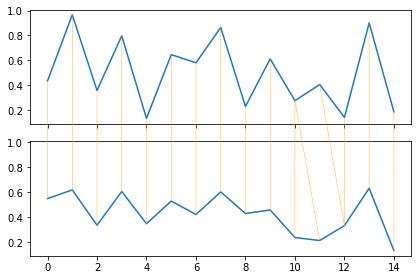

In [71]:
draw_path(x1, y1[index])

y shape:  (7990000, 15)


DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


Time:  2.3368732929229736
0.7745020669151857


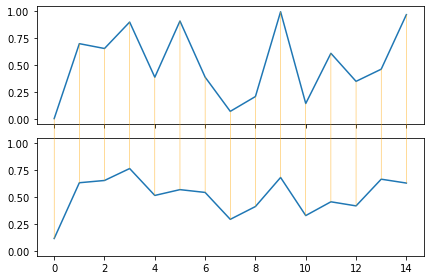

In [95]:
x = np.random.rand(1,30)
x1, y1 = dataClip(x, y, 15)
index = measureDistance(x1, y1, end = True)
draw_path(x1, y1[index])


In [38]:
x1, y1 = dataClip(x, y, 15)
index1 = measureDistance(x1, y1)
y2 = y[index1]
df1 = df.loc[index1]
df1.index = range(len(df1.index))

# x2, y2 = dataClip(x, y2, 30)
# index2 = measureDistance(x2, y2, end = True)
# y3 = y2[index2]
# df2 = df1.loc[index2]


# x3, y3 = dataClip(x, y3, 30)
# index3 = measureDistance(x3, y3, end = True)
# y3 = y[index3]




y shape:  (8250000, 15)


DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


Time:  3.881025552749634


DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


y shape:  (1649994, 30)
Time:  1.3177571296691895


## Build API

In [1]:
import flask
app = flask.Flask(__name__)
app.config["DEBUG"] = True


@app.route('/', methods=['GET'])
def home():
    return "<h1>Hello Flask!</h1>"

app.run()



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\Users\User\Anaconda3\envs\notebook\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [302]:
from flask import Flask, render_template, url_for, jsonify, request

app = Flask(__name__)
app.config['JSON_AS_ASCII'] = False
# app.config["DEBUG"] = True
@app.route('/')
def index():
    return render_template('index.html')

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1